<pre><h1>Introduction</h1>
The Red Wine Quality dataset contains detailed physicochemical properties of red wine samples. Each sample is assigned a quality score ranging from 0 to 10. In the following section, we will load the dataset into Python and perform an initial analysis to explore its key characteristics.

<b>Objective:</b>
    Goal of the analysis is to find out the relation ship between predictor variables  and target variable. Estimation of function (model function) is employed here for inference purpose to find out which predictors are associated with response and type of relationship with response.

In [2]:
import warnings
import opendatasets as od
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor
import numpy as np
from scipy.stats import skew
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.metrics import r2_score, mean_squared_error

warnings.filterwarnings(action="ignore")

<pre><h1>1. Data Loading and Observations</h1>

In [311]:
# Download the dataset from kaggle into the local machine
dataset = r"https://www.kaggle.com/datasets/uciml/red-wine-quality-cortez-et-al-2009"
od.download(dataset, force=True)

In [317]:
# list the files to find the names of the files
data_dir = r".\red-wine-quality-cortez-et-al-2009"
os.listdir(data_dir)

['winequality-red.csv']

In [3]:
# load the dataset using pandas from the original folder downloaded from kaggle
data = pd.read_csv(r".\red-wine-quality-cortez-et-al-2009\winequality-red.csv")

In [4]:
data.head(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.0,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5


<pre><h2>1.1 Dataset Description</h2>
<h3>Variables:</h3>
<b>Fixed acidity:</b> It indicates the amount of tartaric acid in wine and is measured in g/dm3
<b>Volatile acidity:</b> It indicates the amount of acetic acid in the wine. It is measured in g/dm3.
<b>Citric acid:</b> It indicates the amount of citric acid in the wine. It is also measured in g/dm3
<b>Residual sugar:</b> It indicates the amount of sugar left in the wine after the fermentation process is done. 
                It is also measured in g/dm3
<b>Free sulfur dioxide:</b> It measures the amount of sulfur dioxide (SO2) in free form. It is also measured in g/dm3
<b>Total sulfur dioxide:</b> It measures the total amount of SO2 in the wine. This chemical works as an antioxidant and 
                        antimicrobial agent.
<b>Density:</b> It indicates the density of the wine and is measured in g/dm3.
<b>pH:</b> It indicates the pH value of the wine. The range of value is between 0 to 14.0, which indicates very high acidity, 
    and 14 indicates basic acidity.
<b>Sulphates: </b>It indicates the amount of potassium sulphate in the wine. It is also measured in g/dm3.
<b>Alcohol:</b> It indicates the alcohol content in the wine.
<b>Quality:</b> It indicates the quality of the wine, which is ranged from 1 to 10. Here, the higher the value is, the better the wine.


<pre><h1>1.2 Formulating Hypothesis</h1>
<h3><u>i. Primary Hypothesis:</u></h3>Higher alcohol content has a positive impact on perceived wine quality.
<b>Null Hypothesis (𝐻0):</b> Alcohol content has no significant impact on wine quality.
<b>Alternative Hypothesis (𝐻1):</b> Alcohol content significantly improves wine quality.

<h3><u>ii. Secondary Hypothesis:</u></h3>Higher volatile acidity negatively impacts wine quality.
<b>Null Hypothesis (𝐻0):</b> Volatile acidity has no significant impact on wine quality.
<b>Alternative Hypothesis (𝐻1):</b> Volatile acidity significantly reduces wine quality.

<pre><h1>2. Exploratory Data Analysis</h1>

<pre><h2>2.1 Dataset Overview</h2>

In [5]:
# Display dataset info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
# Check null values
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [37]:
# Check duplicated values
data.duplicated().sum()

240

<pre><h3>Overview summary:</h3>
<b>Sample Size:</b> 1,599 samples (rows) and 12 variables (columns).
<b>Missing Values:</b> No missing values in the dataset.
<b>Duplicated Values:</b> There are 240 duplicated samples(rows).

As the dataset has few duplicates, comparatively less proportion. Considering few assumptions the duplicated samples were not disregarded for the following reasons.
1. Few of the physicochemical properties have small ranges which is why duplicates are naturally expected.
2. The small proportion likely have minimal impact on the analysis or model. The removed duplicates might not represent the real
   world patterns.

<pre><h2>2.2 Descriptive Statistics</h2>

In [40]:
# Descriptive statistics of all numerical variables
data.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


<pre><h4>Summary of Statistics:</h4>

<pre>For most of the columns the mean values are higher than median values. There is chance of positive skewness in few columns.

<pre><h2>2.3 Visualize individual variables and relationships between variables</h2>

<pre><h3>2.3.1 Histograms of individual variables</h3>


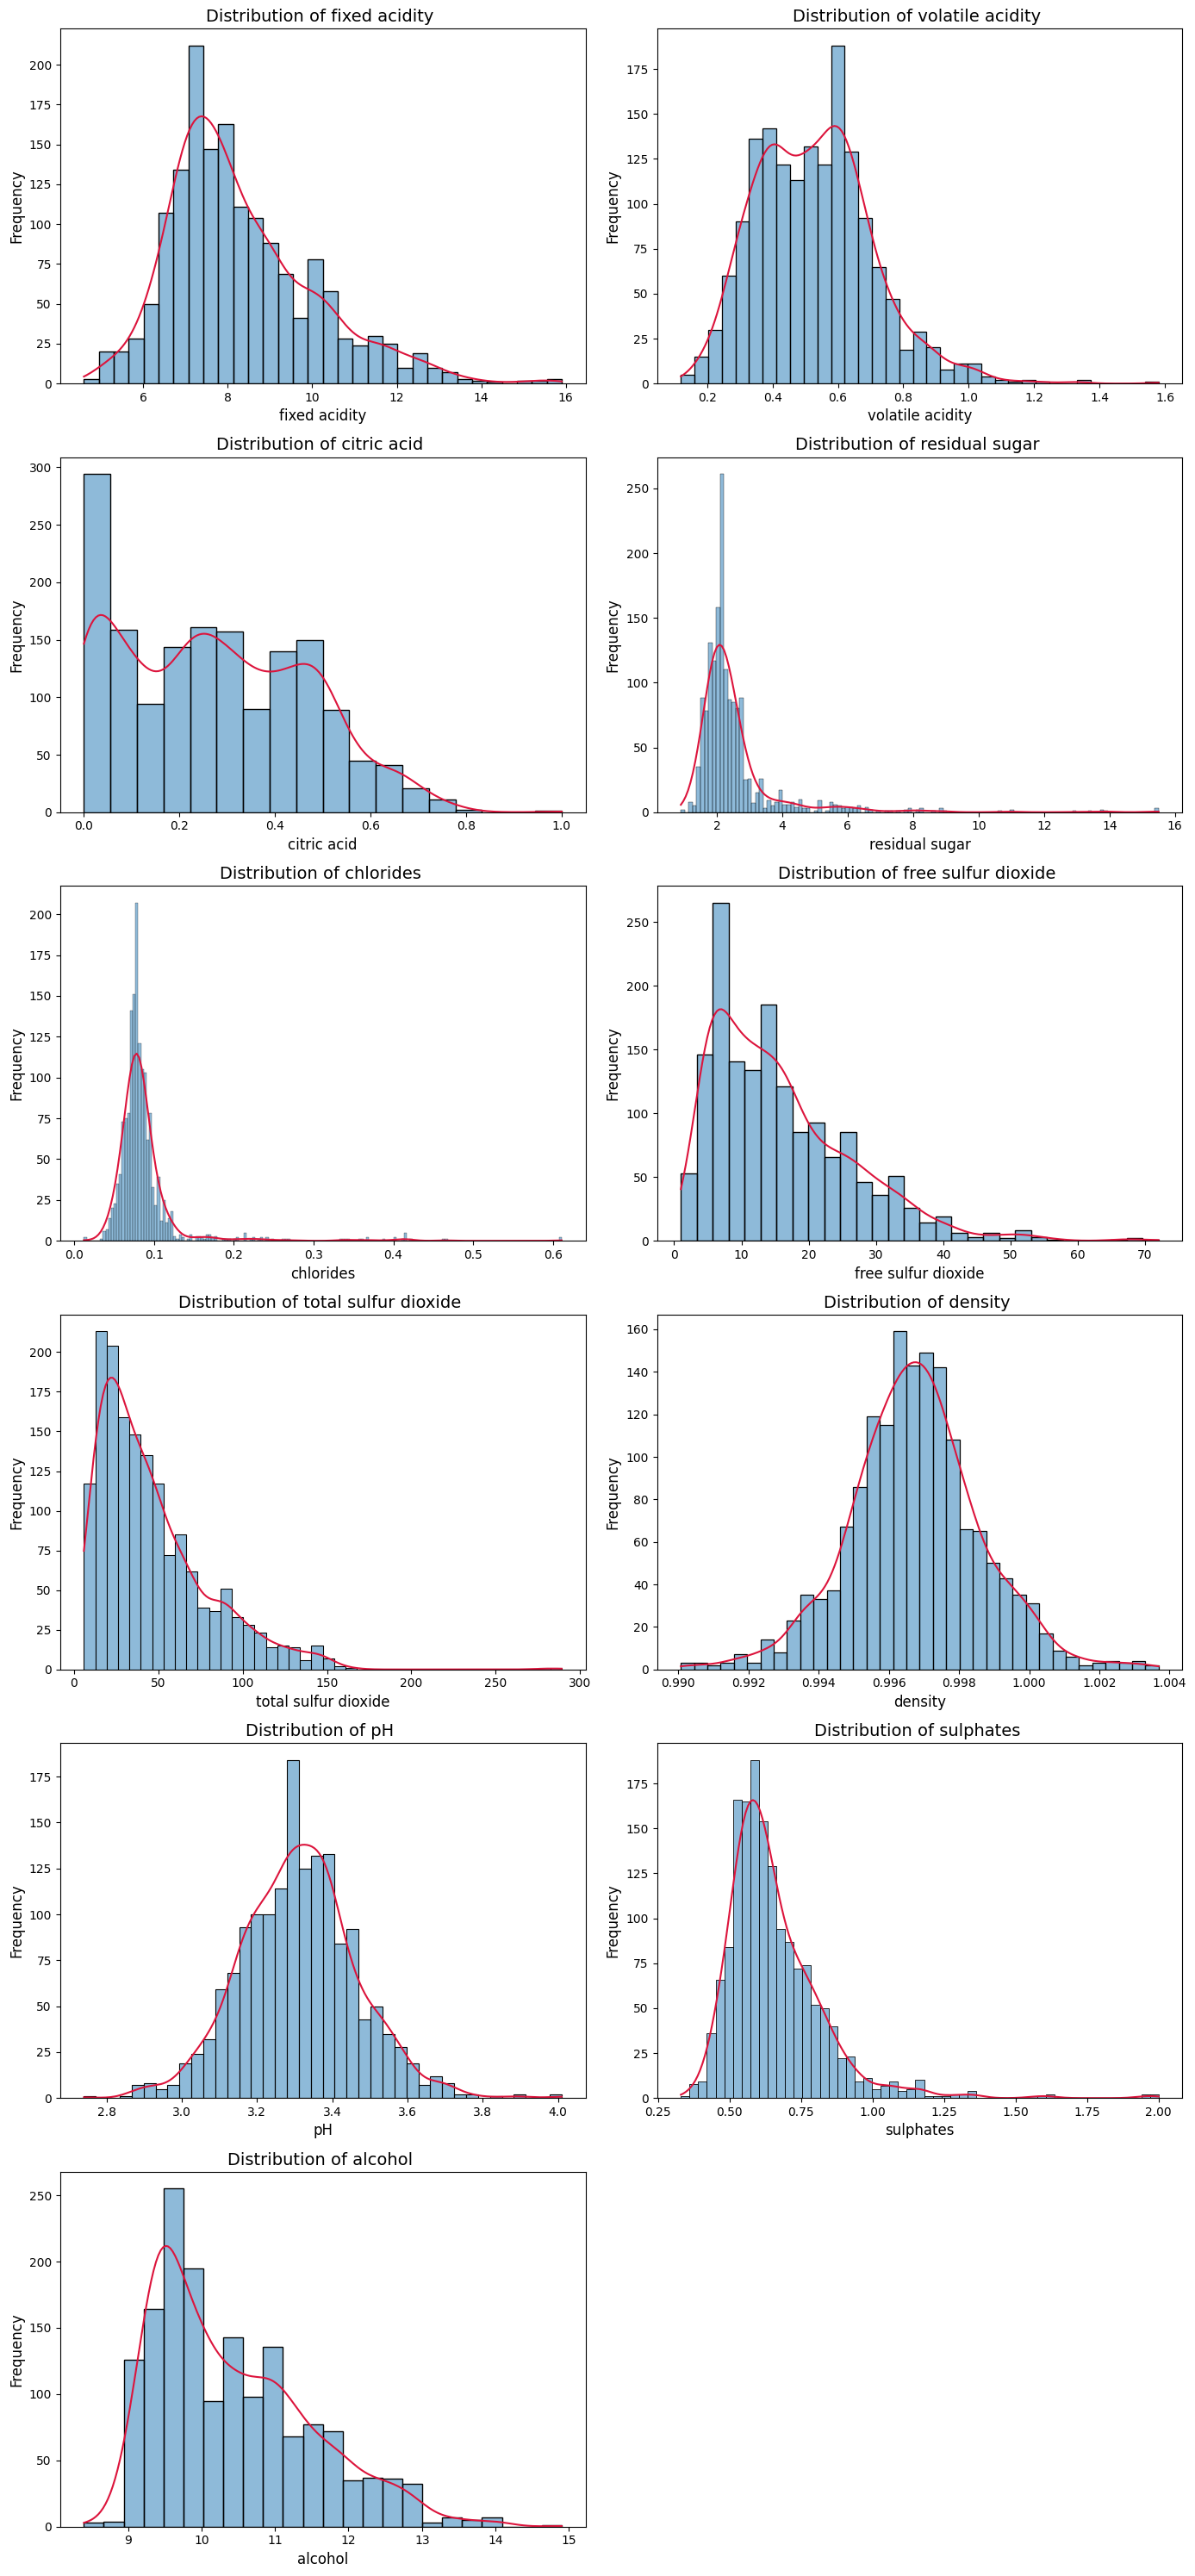

In [7]:
# Set up a grid of subplots
num_vars = len(data.columns)
cols = 2  # Number of columns in the grid
rows = (num_vars + cols - 1) // cols  # Number of rows in the grid

fig, axes = plt.subplots(rows, cols, figsize=(14, 5 * rows))
axes = axes.flatten()  # Flatten the 2D array of axes to easily iterate over them

# Loop through each variable and create a histogram with KDE
for ax, variable in zip(axes, data.drop("quality", axis=1).columns):
    # axs = sns.histplot(data[variable], kde=True, ax=ax, linewidth=2)
    axs = sns.histplot(data[variable], kde=True, ax=ax)
    axs.lines[0].set_color("crimson")
    axs.set_title(f"Distribution of {variable} ", fontsize=14)
    axs.set_xlabel(variable, fontsize=12)
    axs.set_ylabel("Frequency", fontsize=12)

# Hide unused subplots if there are any
for ax in axes[len(data.drop("quality", axis=1).columns) :]:
    ax.set_visible(False)

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

<pre><h4>Observations from distributions:</h4>
* From the histograms it is observed that most of the variables have normal distribution. However the varaibles which are not 
  normally distributed are skewed to the right. Only differences is in level of skewness.
* The quality values seems to dispaly a normal distribution. Most observations have values equial to 5 or 6.
* Log transformation is suitable on the variables with skewness since it works well on the non zero and non negative having 
  positively skewed data.

<pre><h3>2.3.2 Box plots of predictors with quality variable</h3>
In the following step we will check outliers and visualise how the distribution of levels of quality with each predictor.

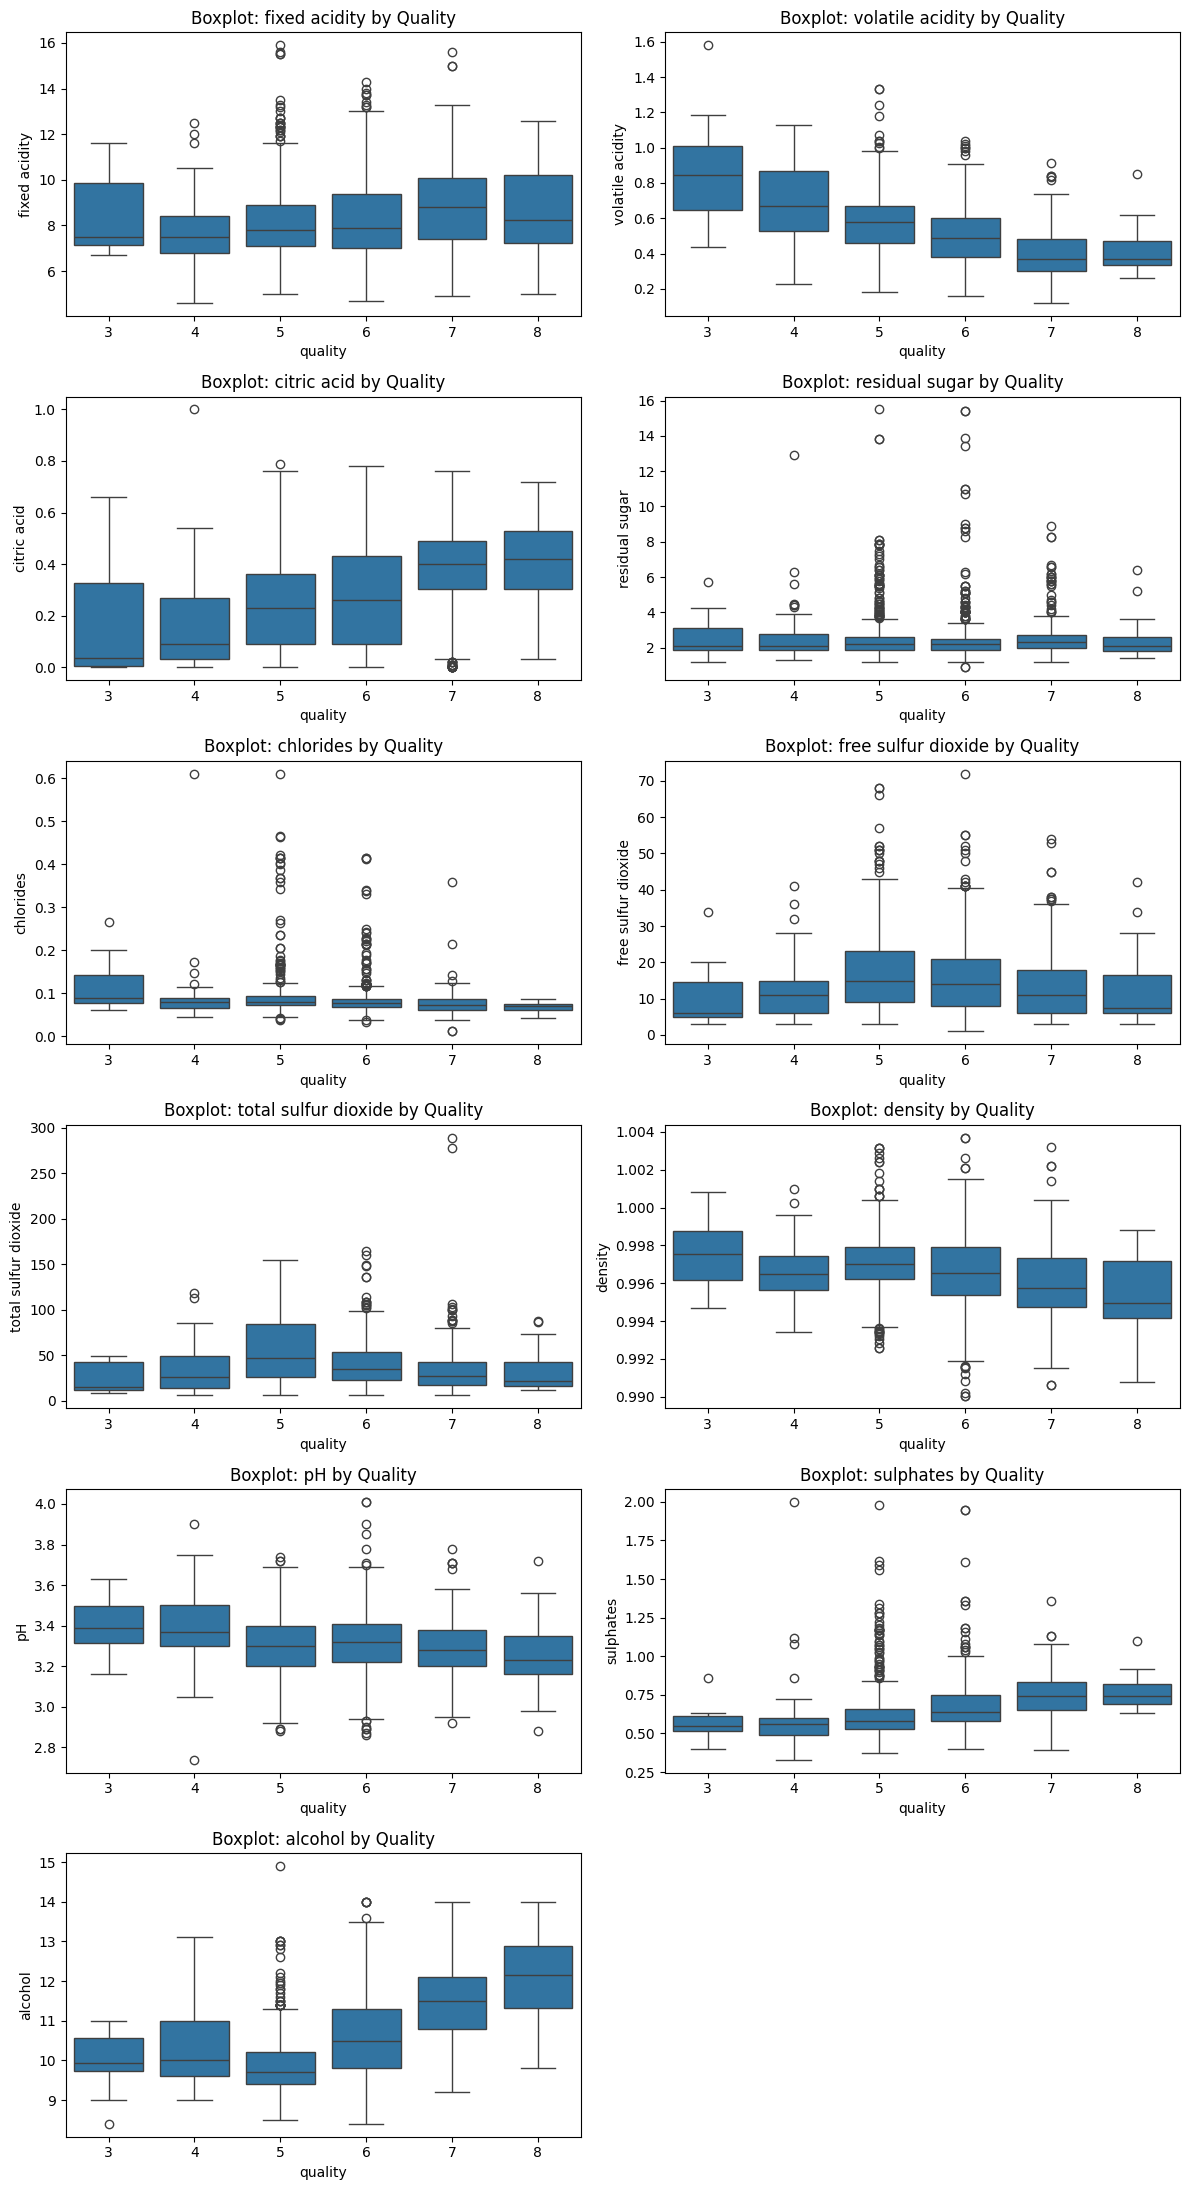

In [8]:
num_features = len(data.drop("quality", axis=1).columns)
fig, axes = plt.subplots(
    nrows=(num_features + 1) // 2, ncols=2, figsize=(12, num_features * 2)
)

axes = axes.flatten()

# Loop through each feature and create a boxplot
for i, feature in enumerate(data.drop("quality", axis=1).columns):
    sns.boxplot(x=data["quality"], y=data[feature], ax=axes[i])
    axes[i].set_title(f"Boxplot: {feature} by Quality")

# Hide unused subplots if there are any
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

<pre><h4>Observations:</h4>
    * From the box plots, it is visible that following variables might not influence the quality of the wine significantly.
          [Fixed acidity, residual sugar, chlorides, free sulphur dioxide, total sulphur dioxide, density, Ph, density]
    
    * Following variables shows the sign of altering the quality of the red wine.
          [Volatile acidity, citric acid, sulphates and alcohol]
    
    * Also there are vsisible outliers in few predictors. However the outliers are not being treated to potential insights. Due to 
      small ranges there may be less variability naturally and as few other predictors do not have outliers there shall be some 
      relation with such predictors.
    
However there is always a scope to determine the level of influnce that the factors decides the quality of the wine. Hence 
correlation analysis among variables will provide some more insights.

<pre><h3>2.3.3 Correlation Analysis</h3>
Following the results of box plot furtherly we will check correlation of predictors by using Spearman correlation.

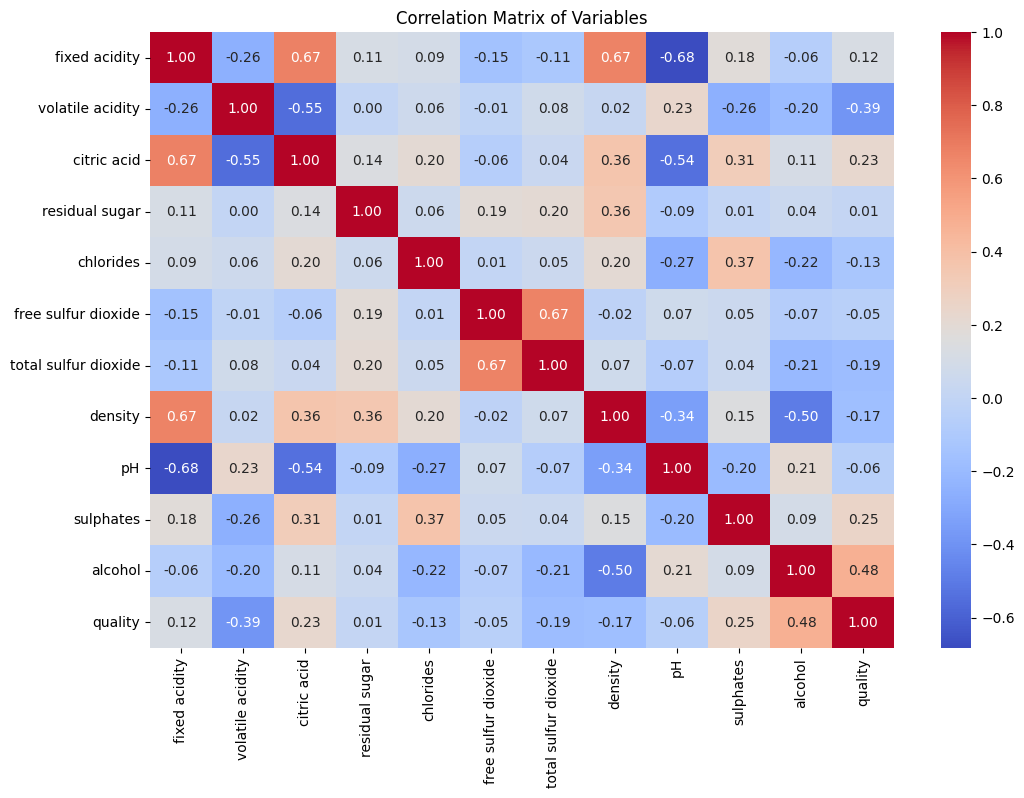

In [8]:
# Compute and visualize correlation matrix
correlation_matrix = data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Matrix of Variables")
plt.show()

<pre><h4>Observations:</h4>
Based on the results from the box plots it worth to pay attention towards the factors that showed the influence visually how these factors correlated with the output variable; quality.</pre>

|    Factor      | correlation coefficient | Impact on Quality|
|----------------|-------------------------|------------------|
|volatile acidity| 0.39                    | Negative         |
|citric acid     | 0.23                    | Positive         |
|sulphates       | 0.25                    | Positive         |
|alcohol         | 0.48                    | Positive         |

<pre>It seems the results from box plot and correlation matrix shows similarities. Additionally independent variables' correlation shall be observed from the correlation matrix.
    
    * fixed acidity: positive correlation with citric acid, density and negative correlation with pH, volatile acidity(mildly)
    * volatile acidity: negative correlation with citric acid and mildly with alcohol and sulphates.
    * citric acid: positive correlation with density, sulphates and negative correlation with fixed acidity, volatile acidity, pH
    * chlorides: positive correlation with sulphates
    * pH: negative correlation with fixed acidity, citric acid, chlorides, density
    * alcohol: negative correlation with density
    * density: positive correlation with fixed acidity, citric acid, residual sugar and negative correlation with alcohol

Additional Observations: 
    * There are notable correlations between some features, e.g., free sulfur dioxide and total sulfur dioxide (r=0.62), which may 
    indicate multicollinearity.
    * Alcohol and quality (r=0.44) have the strongest positive correlation among the predictors, while volatile acidity has the 
    strongest negative correlation (r=−0.39).

<pre><h3>2.3.4 Multicollinearity of predictors</h3>

In [16]:
# Select only predictors data
predictors_data = data.drop(columns=["quality"])

# Add a constant column to compute VIF
predictors_data["const"] = 1

# Calculate VIF for each variable
vif_data = pd.DataFrame(
    {
        "Variable": predictors_data.columns,
        "VIF": [
            variance_inflation_factor(predictors_data.values, i)
            for i in range(predictors_data.shape[1])
        ],
    }
)
# Round the VIF values to two decimal places
vif_data["VIF"] = vif_data["VIF"].round(2)

# Print VIF scores
vif_data.sort_values(by="VIF", ascending=False)

,Variable,VIF
11,const,1710538.50
0,fixed acidity,7.77
7,density,6.34
8,pH,3.33
2,citric acid,3.13
10,alcohol,3.03
6,total sulfur dioxide,2.19
5,free sulfur dioxide,1.96
1,volatile acidity,1.79
3,residual sugar,1.70


<pre><h4>Interpretations based on your VIF values:</h4>
1) The constant term (intercept) has a very high VIF value of 1710538.50. This is normal since the constant term is a linear 
   combination of all other predictors and will always have a high VIF.
2) Features with VIF ≥ 5; fixed acidity & density show some level of multicollinearity with other variables in the model. It is to
   investigate further interpretations whether these features are highly correlated with each other or others.
3) Other predictors' VIFs suggest that they are not highly correlated with other predictors.


<pre>Let us look into the fixed acidity & density variables how both of these columns have relation with co predictors.

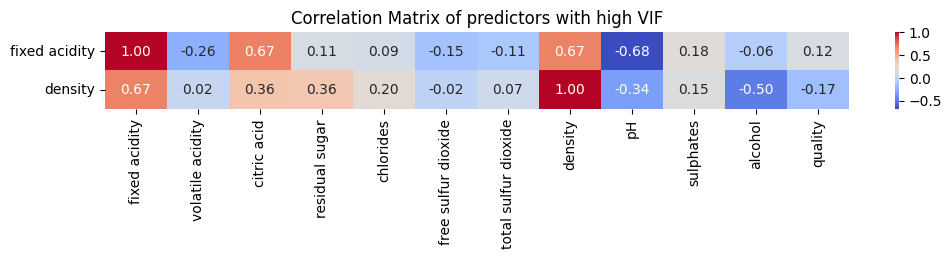

In [67]:
def corr_interested_columns(columns_of_interest: list, data, fig_size):
    # Compute the correlation matrix
    correlation_matrix = data.corr()

    # Extract correlations for the columns of interest with all other columns
    correlations_of_interest = correlation_matrix.loc[columns_of_interest]

    plt.figure(figsize=fig_size)
    sns.heatmap(
        correlations_of_interest, annot=True, fmt=".2f", cmap="coolwarm", cbar=True
    )


columns_of_interest = ["fixed acidity", "density"]
corr_interested_columns(columns_of_interest, data, (12, 1))
plt.title("Correlation Matrix of predictors with high VIF")
plt.show()

In [24]:
def individual_pair_plot(columns_of_interest, data, y_var_column):
    """
    Creates a pairplot for the specified columns of interest with the specified y-variable.

    Parameters:
    columns_of_interest (list): List of column names to consider for the pairplot.
    data (DataFrame): The dataset containing the columns.
    y_variable (str): The column name to use as the y-variable.
    """
    x_vars = [y_var_column] + [
        col for col in columns_of_interest if col != y_var_column
    ]

    # Create the pairplot
    sns.pairplot(data[columns_of_interest], y_vars=[y_var_column], x_vars=x_vars[1:])
    plt.suptitle(f"Pairplot of '{y_var_column}' with other correlated columns", y=1.05)
    plt.show()

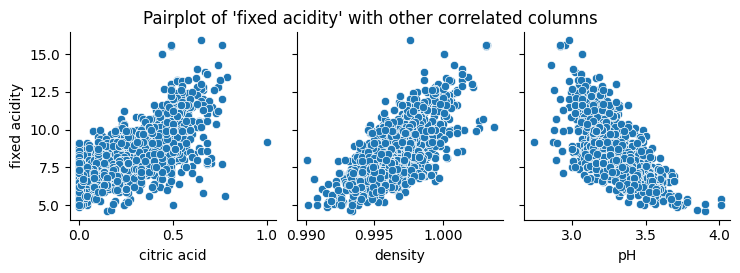

In [25]:
columns_of_interest = ["fixed acidity", "citric acid", "density", "pH"]
individual_pair_plot(columns_of_interest, data, "fixed acidity")

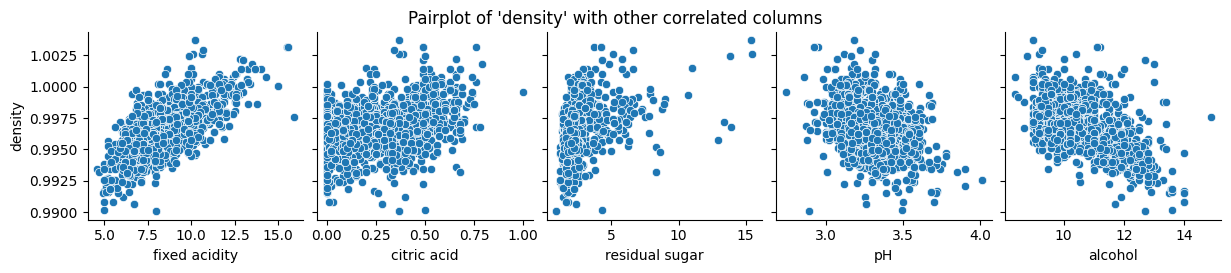

In [21]:
columns_of_interest = [
    "fixed acidity",
    "citric acid",
    "residual sugar",
    "density",
    "pH",
    "alcohol",
]
individual_pair_plot(columns_of_interest, data, "density")

<pre>As expected the both of these columns shows pretty clear relation ship with few of the other predictors. It shall be good 
idea to dis regard the predictors of multicollinearity to avoid unreliable and unstable estimates of regression coefficients. 
Especially in inference setting. However no action is being taken at this stage. 

<pre><h1>3. Data Preprocessing</h1>

<pre><h2>3.1 Log Transformation of skewed variables</h2>

Considering the results witnessed from distributions that few of the independent variables are skewed to the right.
Log Transformation is being used to transform the data because it can stabilize the variance and it also can linearize the relationships between variables and certainly it will reduce the skewness. Also it works well on non-negative, non-zero and positively skewed data.

In [12]:
# Function to check skewness and apply log transformation if needed
def check_and_transform_skewness(df, skew_level):
    transformed_df = (
        df.copy()
    )  # Make a copy to apply transformations without altering original data

    # Check skewness of each column
    for column in df.columns:
        # Calculate skewness
        column_skewness = skew(df[column])

        # Apply log transformation if skewness is greater/less than desired level
        if column_skewness > skew_level or column_skewness < -skew_level:
            # Log transformation: Apply log(1 + x) to handle zero or negative values
            transformed_df[column] = np.log1p(df[column])
            # print(f"Applied log transformation to {column}")

    return transformed_df

<pre>Let us consider transforming the variables having skewness>2 (which is to consider at least moderately skewed) and processes 
accordingly, if necessary twice.

In [13]:
# Apply the function to check skewness and transform
transformed_data = check_and_transform_skewness(data, 2)

# Optionally: Check the skewness again after transformation
print("Skewness after log transformation:\n")
for column in transformed_data.columns:
    column_skewness = skew(transformed_data[column])
    if column_skewness > 2 or column_skewness < -2:
        print(f"{column}: {skew(transformed_data[column]):.4f}")

Skewness after log transformation:

residual sugar: 2.2530
chlorides: 5.0667


In [14]:
# Apply the function to check skewness and transform
transformed_data = check_and_transform_skewness(transformed_data, 2)

# Optionally: Check the skewness again after transformation
print("Skewness after log transformation:\n")
for column in transformed_data.columns:
    column_skewness = skew(transformed_data[column])
    if column_skewness > 2 or column_skewness < -2:
        print(f"{column}: {skew(transformed_data[column]):.4f}")

Skewness after log transformation:

chlorides: 4.6040


In [15]:
for i, column in enumerate(transformed_data.columns):
    print(f"{column}: {skew(transformed_data)[i]:.2f}")

fixed acidity: 0.98
volatile acidity: 0.67
citric acid: 0.32
residual sugar: 1.66
chlorides: 4.60
free sulfur dioxide: 1.25
total sulfur dioxide: 1.51
density: 0.07
pH: 0.19
sulphates: 1.61
alcohol: 0.86
quality: 0.22


<pre>Now, except 'chlorides' column all other columns are at least moderately skewed. Following to the transformations, let us apply 
standardization on data to bring all the variables into same units.

<pre><h2>3.2 Rescaling the transformed data</h2>
The transfomed data is now undergo rescaling process to make all the varibles to have similar format.
Scaling is being done seperately on trian and test data to avoud data leakage.

In [272]:
# Split the data into training (80%) and testing (20%) sets
data_train, data_test = train_test_split(
    transformed_data, test_size=0.2, random_state=100
)

In [273]:
scaler = MinMaxScaler()

In [274]:
data_train[:] = scaler.fit_transform(data_train[:])

In [275]:
data_train.head(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
382,0.321429,0.095890,0.42,0.292182,0.164934,0.140845,0.074205,0.538179,0.370079,0.348272,0.153846,0.6
1034,0.375000,0.428082,0.18,0.376559,0.158086,0.197183,0.148410,0.537445,0.362205,0.089885,0.200000,0.6


In [276]:
data_test[:] = scaler.fit_transform(data_test[:])

In [277]:
data_test.head(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1254,0.307692,0.613636,0.078947,0.215392,0.162475,0.339286,0.177215,0.492147,0.479167,0.359426,0.446429,0.4
1087,0.317308,0.034091,0.552632,0.117110,0.111345,0.303571,0.145570,0.293194,0.364583,0.359426,0.500000,0.6


<pre><h1>4. Model Fitting</h1>
Once the data is pre-processed, it is ready to fit the model. Let us now estimate coefficients of linear regression using OLS technique to describe the relationship between dependent and independent varaibles.
A classical approach of Backward selection to be used to find which variables have the largest impact on the dependent variable. For this, we will consider sequence of models by eliminating varibles based on the results of variours metrics such as p-value, confidence intervals & t-statistic.

Also, it is point to be observed how the R2-squared values, RMSE and f-statistic alters for each new model in the journey of finding the influencing predictors.

First, let us split the data into train and test datasets for our analysis.

It is just to provide prior information; the noticeable change are started from model 7.

In [278]:
# Add a constant for the intercept in the regression model
data_train = sm.add_constant(data_train)
data_test = sm.add_constant(data_test)

# assigning train and test data to varaibles
X_train = data_train.drop("quality", axis=1)
y_train = data_train["quality"]

X_test = data_test.drop("quality", axis=1)
y_test = data_test["quality"]

<pre><h2>4.1 Model 1</h2>
Based on the Backward selection all available independent variables are considered to fit the model to acquire the results.

In [279]:
# Fit an OLS model using all predictors
model1 = sm.OLS(y_train, X_train).fit()

# Display the summary of the initial model
model1_summary = model1.summary()
print(model1_summary)

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.374
Model:                            OLS   Adj. R-squared:                  0.369
Method:                 Least Squares   F-statistic:                     68.83
Date:                Sat, 28 Dec 2024   Prob (F-statistic):          1.24e-120
Time:                        17:13:17   Log-Likelihood:                 811.46
No. Observations:                1279   AIC:                            -1599.
Df Residuals:                    1267   BIC:                            -1537.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.5404 

In [282]:
# Initialize an empty list to store model evaluation results
results = []


# Function to evaluate a model and store results
def evaluate_model(
    model, model_name, X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test
):
    # Predict on train and test data
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Compute metrics
    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

    # Append results as a dictionary
    results.append(
        {
            "Model": model_name,
            "Train R^2": round(r2_train, 4),
            "Test R^2": round(r2_test, 4),
            "Train RMSE": round(rmse_train, 4),
            "Test RMSE": round(rmse_test, 4),
        }
    )

    results_df = pd.DataFrame(results)

    return results_df

In [283]:
# Model1 results
evaluate_model(model1, "Model1")

,Model,Train R^2,Test R^2,Train RMSE,Test RMSE
0,Model1,0.374,0.2676,0.1283,0.1356


<pre><h2>4.2 Model 2</h2>
From the results of Model 1, the variable; citric acid has p-value of 0.441 which makes statistically insignificat that shows no relation with the target variable.

In [285]:
selected_columns = X_train.drop(columns=["citric acid"], axis=1).columns
X_train_selected = X_train[selected_columns]
X_test_selected = X_test[selected_columns]

# Fit the model
model2 = sm.OLS(y_train, X_train_selected).fit()

# Print the summary
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.374
Model:                            OLS   Adj. R-squared:                  0.369
Method:                 Least Squares   F-statistic:                     75.67
Date:                Sat, 28 Dec 2024   Prob (F-statistic):          1.86e-121
Time:                        17:14:39   Log-Likelihood:                 811.16
No. Observations:                1279   AIC:                            -1600.
Df Residuals:                    1268   BIC:                            -1544.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.5386 

In [286]:
evaluate_model(model2, "Model2", X_train=X_train_selected, X_test=X_test_selected)

,Model,Train R^2,Test R^2,Train RMSE,Test RMSE
0,Model1,0.3740,0.2676,0.1283,0.1356
1,Model2,0.3737,0.2626,0.1283,0.1360


<pre><h2>4.3 Model 3</h2>
From the results of Model 2, the next varible to be dropped under same creteria as model 2 is 'fixed acidity' with p-value of 0.472.

In [287]:
selected_columns = X_train.drop(
    columns=["fixed acidity", "citric acid"], axis=1
).columns
X_train_selected = X_train[selected_columns]
X_test_selected = X_test[selected_columns]

# Fit the model
model3 = sm.OLS(y_train, X_train_selected).fit()

# Print the summary
print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.373
Model:                            OLS   Adj. R-squared:                  0.369
Method:                 Least Squares   F-statistic:                     84.06
Date:                Sat, 28 Dec 2024   Prob (F-statistic):          2.54e-122
Time:                        17:15:44   Log-Likelihood:                 810.90
No. Observations:                1279   AIC:                            -1602.
Df Residuals:                    1269   BIC:                            -1550.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.5472 

In [226]:
# Model3 evaluation
print(f"Coefficients: {model3.params}")

Coefficients: const                   0.542929
fixed acidity          -0.000162
volatile acidity       -0.295198
citric acid            -0.021164
chlorides              -0.180472
free sulfur dioxide     0.058053
total sulfur dioxide   -0.191673
pH                     -0.134570
sulphates               0.260563
alcohol                 0.393616
dtype: float64


In [288]:
evaluate_model(model3, "Model3", X_train=X_train_selected, X_test=X_test_selected)

,Model,Train R^2,Test R^2,Train RMSE,Test RMSE
0,Model1,0.3740,0.2676,0.1283,0.1356
1,Model2,0.3737,0.2626,0.1283,0.1360
2,Model3,0.3735,0.2623,0.1284,0.1361


<pre><h2>4.4 Model 4</h2>
From the results of Model 3, the next variable to be dropped is 'density' with p-value of 0.156.

In [290]:
selected_columns = X_train.drop(
    columns=["density", "fixed acidity", "citric acid"], axis=1
).columns
X_train_selected = X_train[selected_columns]
X_test_selected = X_test[selected_columns]

# Fit the model
model4 = sm.OLS(y_train, X_train_selected).fit()

# Print the summary
print(model4.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.372
Model:                            OLS   Adj. R-squared:                  0.369
Method:                 Least Squares   F-statistic:                     94.24
Date:                Sat, 28 Dec 2024   Prob (F-statistic):          6.89e-123
Time:                        17:17:08   Log-Likelihood:                 809.88
No. Observations:                1279   AIC:                            -1602.
Df Residuals:                    1270   BIC:                            -1555.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.5171 

In [291]:
evaluate_model(model4, "Model4", X_train=X_train_selected, X_test=X_test_selected)

,Model,Train R^2,Test R^2,Train RMSE,Test RMSE
0,Model1,0.3740,0.2676,0.1283,0.1356
1,Model2,0.3737,0.2626,0.1283,0.1360
2,Model3,0.3735,0.2623,0.1284,0.1361
3,Model4,0.3725,0.2665,0.1285,0.1357


<pre><h2>4.5 Model 5</h2>
From the results of Model 4, the next varible to be dropped is 'residual sugar' with p-value of 0.156.

In [292]:
selected_columns = X_train.drop(
    columns=["density", "fixed acidity", "citric acid", "residual sugar"], axis=1
).columns
X_train_selected = X_train[selected_columns]
X_test_selected = X_test[selected_columns]


# Fit the model
model5 = sm.OLS(y_train, X_train_selected).fit()

# Print the summary
print(model5.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.371
Model:                            OLS   Adj. R-squared:                  0.368
Method:                 Least Squares   F-statistic:                     107.3
Date:                Sat, 28 Dec 2024   Prob (F-statistic):          1.74e-123
Time:                        17:18:37   Log-Likelihood:                 808.87
No. Observations:                1279   AIC:                            -1602.
Df Residuals:                    1271   BIC:                            -1561.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.5298 

In [293]:
evaluate_model(model5, "Model5", X_train=X_train_selected, X_test=X_test_selected)

,Model,Train R^2,Test R^2,Train RMSE,Test RMSE
0,Model1,0.3740,0.2676,0.1283,0.1356
1,Model2,0.3737,0.2626,0.1283,0.1360
2,Model3,0.3735,0.2623,0.1284,0.1361
3,Model4,0.3725,0.2665,0.1285,0.1357
4,Model5,0.3715,0.2735,0.1286,0.1350


<pre><h2>4.6 Model 6</h2>
From the results of Model 5, it seems 'free sulfur dioxide' has reasonable p-value to drop.

In [294]:
selected_columns = X_train.drop(
    columns=[
        "free sulfur dioxide",
        "citric acid",
        "fixed acidity",
        "density",
        "residual sugar",
    ],
    axis=1,
).columns
X_train_selected = X_train[selected_columns]
X_test_selected = X_test[selected_columns]

# Fit the model
model6 = sm.OLS(y_train, X_train_selected).fit()

# Print the summary
print(model6.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.370
Model:                            OLS   Adj. R-squared:                  0.367
Method:                 Least Squares   F-statistic:                     124.4
Date:                Sat, 28 Dec 2024   Prob (F-statistic):          7.97e-124
Time:                        17:20:20   Log-Likelihood:                 807.17
No. Observations:                1279   AIC:                            -1600.
Df Residuals:                    1272   BIC:                            -1564.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.5308 

In [241]:
# Select only predictors data
predictors_data = X_train[selected_columns]

# Add a constant column to compute VIF
predictors_data["const"] = 1

# Calculate VIF for each variable
vif_data = pd.DataFrame(
    {
        "Variable": predictors_data.columns,
        "VIF": [
            variance_inflation_factor(predictors_data.values, i)
            for i in range(predictors_data.shape[1])
        ],
    }
)
# Round the VIF values to two decimal places
vif_data["VIF"] = vif_data["VIF"].round(2)

# Print VIF scores
vif_data.sort_values(by="VIF", ascending=False)

,Variable,VIF
0,const,35.76
2,chlorides,1.32
5,sulphates,1.31
1,volatile acidity,1.25
4,pH,1.23
6,alcohol,1.23
3,total sulfur dioxide,1.05


In [295]:
evaluate_model(model6, "Model6", X_train=X_train_selected, X_test=X_test_selected)

,Model,Train R^2,Test R^2,Train RMSE,Test RMSE
0,Model1,0.3740,0.2676,0.1283,0.1356
1,Model2,0.3737,0.2626,0.1283,0.1360
2,Model3,0.3735,0.2623,0.1284,0.1361
3,Model4,0.3725,0.2665,0.1285,0.1357
4,Model5,0.3715,0.2735,0.1286,0.1350
5,Model6,0.3698,0.2750,0.1287,0.1349


<pre><h2>4.7 Model 7</h2>
Considering the smaller coefficient variable 'pH' shall be dropped ot see if any chance of increment in performance.
We will lso check VIF if the multicollinearity still exists among the independent varaibles.

In [296]:
selected_columns = X_train.drop(
    columns=[
        "free sulfur dioxide",
        "citric acid",
        "fixed acidity",
        "density",
        "residual sugar",
        "pH",
    ],
    axis=1,
).columns
X_train_selected = X_train[selected_columns]
X_test_selected = X_test[selected_columns]

# Fit the model
model7 = sm.OLS(y_train, X_train_selected).fit()

# Print the summary
print(model7.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.364
Model:                            OLS   Adj. R-squared:                  0.362
Method:                 Least Squares   F-statistic:                     145.8
Date:                Sat, 28 Dec 2024   Prob (F-statistic):          1.75e-122
Time:                        17:23:27   Log-Likelihood:                 801.48
No. Observations:                1279   AIC:                            -1591.
Df Residuals:                    1273   BIC:                            -1560.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.4869 

In [297]:
# Select only predictors data
predictors_data = X_train[selected_columns]

# Add a constant column to compute VIF
predictors_data["const"] = 1

# Calculate VIF for each variable
vif_data = pd.DataFrame(
    {
        "Variable": predictors_data.columns,
        "VIF": [
            variance_inflation_factor(predictors_data.values, i)
            for i in range(predictors_data.shape[1])
        ],
    }
)
# Round the VIF values to two decimal places
vif_data["VIF"] = vif_data["VIF"].round(2)

# Print VIF scores
vif_data.sort_values(by="VIF", ascending=False)

,Variable,VIF
0,const,22.74
4,sulphates,1.30
2,chlorides,1.26
5,alcohol,1.17
1,volatile acidity,1.16
3,total sulfur dioxide,1.05


In [298]:
evaluate_model(model7, "Model7", X_train=X_train_selected, X_test=X_test_selected)

,Model,Train R^2,Test R^2,Train RMSE,Test RMSE
0,Model1,0.3740,0.2676,0.1283,0.1356
1,Model2,0.3737,0.2626,0.1283,0.1360
2,Model3,0.3735,0.2623,0.1284,0.1361
3,Model4,0.3725,0.2665,0.1285,0.1357
4,Model5,0.3715,0.2735,0.1286,0.1350
5,Model6,0.3698,0.2750,0.1287,0.1349
6,Model7,0.3642,0.2786,0.1293,0.1346


<pre><h2>4.8 Model 8</h2>
In the similar fahion, the next in the list to drop is chlorides based on the results of p-value.

In [299]:
selected_columns = X_train.drop(
    columns=[
        "free sulfur dioxide",
        "citric acid",
        "fixed acidity",
        "density",
        "residual sugar",
        "pH",
        "chlorides",
    ],
    axis=1,
).columns
X_train_selected = X_train[selected_columns]
X_test_selected = X_test[selected_columns]

# Fit the model
model8 = sm.OLS(y_train, X_train_selected).fit()

# Print the summary
print(model8.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.359
Model:                            OLS   Adj. R-squared:                  0.357
Method:                 Least Squares   F-statistic:                     178.2
Date:                Sat, 28 Dec 2024   Prob (F-statistic):          2.70e-121
Time:                        17:25:37   Log-Likelihood:                 796.04
No. Observations:                1279   AIC:                            -1582.
Df Residuals:                    1274   BIC:                            -1556.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.4680 

In [300]:
evaluate_model(model8, "Model8", X_train=X_train_selected, X_test=X_test_selected)

,Model,Train R^2,Test R^2,Train RMSE,Test RMSE
0,Model1,0.3740,0.2676,0.1283,0.1356
1,Model2,0.3737,0.2626,0.1283,0.1360
2,Model3,0.3735,0.2623,0.1284,0.1361
3,Model4,0.3725,0.2665,0.1285,0.1357
4,Model5,0.3715,0.2735,0.1286,0.1350
5,Model6,0.3698,0.2750,0.1287,0.1349
6,Model7,0.3642,0.2786,0.1293,0.1346
7,Model8,0.3588,0.2588,0.1299,0.1364


<pre><h2>4.9 Model 9</h2>
At this stage it seems all the remaining variables have almost same p-values, let us consider t-statistic and coefficients. 
The column 'total sulfur dioxide' shall be dropped.

In [301]:
selected_columns = X_train.drop(
    columns=[
        "free sulfur dioxide",
        "citric acid",
        "fixed acidity",
        "density",
        "residual sugar",
        "pH",
        "chlorides",
        "total sulfur dioxide",
    ],
    axis=1,
).columns
X_train_selected = X_train[selected_columns]
X_test_selected = X_test[selected_columns]


# Fit the model
model9 = sm.OLS(y_train, X_train_selected).fit()

# Print the summary
print(model9.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.350
Model:                            OLS   Adj. R-squared:                  0.348
Method:                 Least Squares   F-statistic:                     228.4
Date:                Sat, 28 Dec 2024   Prob (F-statistic):          1.43e-118
Time:                        17:27:38   Log-Likelihood:                 786.90
No. Observations:                1279   AIC:                            -1566.
Df Residuals:                    1275   BIC:                            -1545.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.4482      0.016  

In [302]:
evaluate_model(model9, "Model9", X_train=X_train_selected, X_test=X_test_selected)

,Model,Train R^2,Test R^2,Train RMSE,Test RMSE
0,Model1,0.3740,0.2676,0.1283,0.1356
1,Model2,0.3737,0.2626,0.1283,0.1360
2,Model3,0.3735,0.2623,0.1284,0.1361
3,Model4,0.3725,0.2665,0.1285,0.1357
4,Model5,0.3715,0.2735,0.1286,0.1350
5,Model6,0.3698,0.2750,0.1287,0.1349
6,Model7,0.3642,0.2786,0.1293,0.1346
7,Model8,0.3588,0.2588,0.1299,0.1364
8,Model9,0.3495,0.2619,0.1308,0.1361


In [303]:
# Select only predictors data
predictors_data = X_train[selected_columns]

# Add a constant column to compute VIF
predictors_data["const"] = 1

# Calculate VIF for each variable
vif_data = pd.DataFrame(
    {
        "Variable": predictors_data.columns,
        "VIF": [
            variance_inflation_factor(predictors_data.values, i)
            for i in range(predictors_data.shape[1])
        ],
    }
)
# Round the VIF values to two decimal places
vif_data["VIF"] = vif_data["VIF"].round(2)

# Print VIF scores
vif_data.sort_values(by="VIF", ascending=False)

,Variable,VIF
0,const,18.62
1,volatile acidity,1.12
2,sulphates,1.09
3,alcohol,1.05


<pre><h2>4.10 Model 10</h2>
Similarly we can eliminate sulphates from the varaibles to build the new model.

In [304]:
selected_columns = X_train.drop(
    columns=[
        "free sulfur dioxide",
        "citric acid",
        "fixed acidity",
        "density",
        "residual sugar",
        "pH",
        "chlorides",
        "total sulfur dioxide",
        "sulphates",
    ],
    axis=1,
).columns
X_train_selected = X_train[selected_columns]
X_test_selected = X_test[selected_columns]

# Fit the model
model10 = sm.OLS(y_train, X_train_selected).fit()

# Print the summary
print(model10.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.327
Model:                            OLS   Adj. R-squared:                  0.326
Method:                 Least Squares   F-statistic:                     310.1
Date:                Sat, 28 Dec 2024   Prob (F-statistic):          1.80e-110
Time:                        17:28:54   Log-Likelihood:                 765.16
No. Observations:                1279   AIC:                            -1524.
Df Residuals:                    1276   BIC:                            -1509.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.5110      0.013  

In [305]:
evaluate_model(model10, "Model10", X_train=X_train_selected, X_test=X_test_selected)

,Model,Train R^2,Test R^2,Train RMSE,Test RMSE
0,Model1,0.3740,0.2676,0.1283,0.1356
1,Model2,0.3737,0.2626,0.1283,0.1360
2,Model3,0.3735,0.2623,0.1284,0.1361
3,Model4,0.3725,0.2665,0.1285,0.1357
4,Model5,0.3715,0.2735,0.1286,0.1350
5,Model6,0.3698,0.2750,0.1287,0.1349
6,Model7,0.3642,0.2786,0.1293,0.1346
7,Model8,0.3588,0.2588,0.1299,0.1364
8,Model9,0.3495,0.2619,0.1308,0.1361
9,Model10,0.3270,0.2307,0.1330,0.1390


<pre><h1>5. Comparision of models</h1>

The results of the R^2 and RMSE metrics of all models are being used to compare and select the model.
We shall start by plotting the line graphs of R^2 and RMSEs. The primary goal of this analysis is to check how well the models are doing on unseen data i.e. test data.

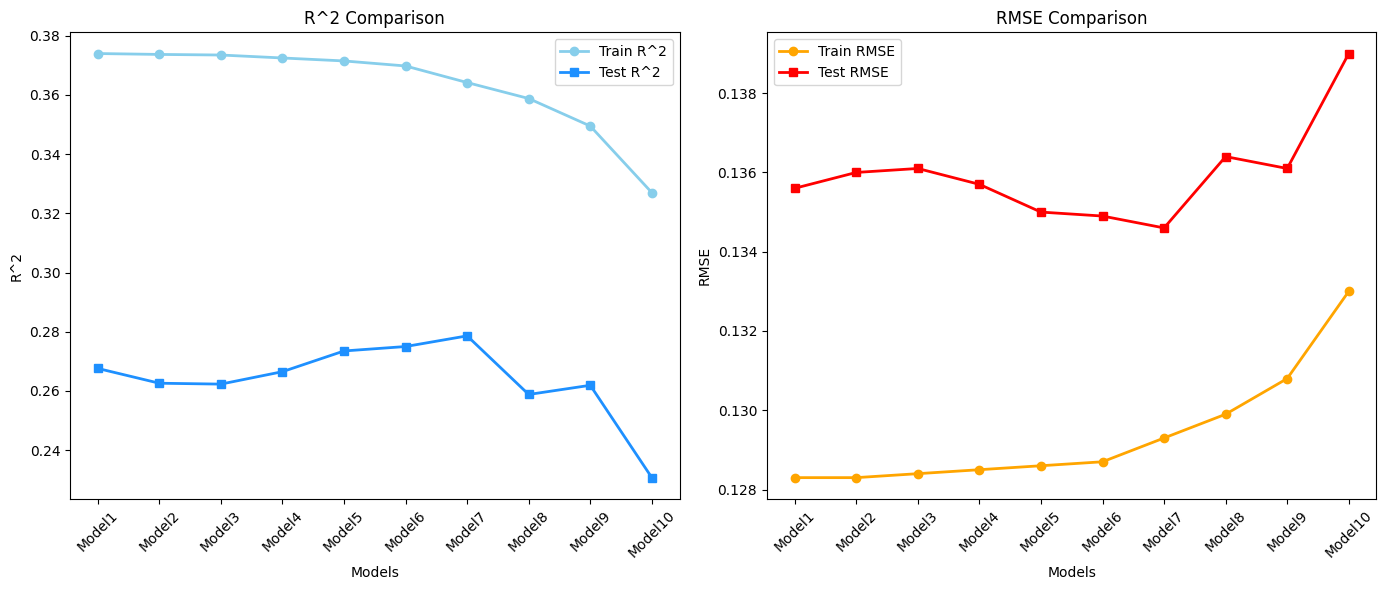

In [306]:
results_df = pd.DataFrame(results)

# Extract data
models = results_df["Model"]
train_r2 = results_df["Train R^2"]
test_r2 = results_df["Test R^2"]
train_rmse = results_df["Train RMSE"]
test_rmse = results_df["Test RMSE"]

# Create figure with 2 subplots (side by side)
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot R^2 values (Train vs Test)
axes[0].plot(
    models,
    train_r2,
    label="Train R^2",
    color="skyblue",
    marker="o",
    linestyle="-",
    linewidth=2,
)  # Train R²
axes[0].plot(
    models,
    test_r2,
    label="Test R^2",
    color="dodgerblue",
    marker="s",
    linestyle="-",
    linewidth=2,
)  # Test R²
axes[0].set_title("R^2 Comparison")  # Title for R² plot
axes[0].set_xlabel("Models")  # X-axis label
axes[0].set_ylabel("R^2")  # Y-axis label
axes[0].tick_params(axis="x", rotation=45)  # Rotate model names for better readability
axes[0].legend()  # Show legend for R² plot

# Plot RMSE values (Train vs Test)
axes[1].plot(
    models,
    train_rmse,
    label="Train RMSE",
    color="orange",
    marker="o",
    linestyle="-",
    linewidth=2,
)  # Train RMSE
axes[1].plot(
    models,
    test_rmse,
    label="Test RMSE",
    color="red",
    marker="s",
    linestyle="-",
    linewidth=2,
)  # Test RMSE
axes[1].set_title("RMSE Comparison")  # Title for RMSE plot
axes[1].set_xlabel("Models")  # X-axis label
axes[1].set_ylabel("RMSE")  # Y-axis label
axes[1].tick_params(axis="x", rotation=45)  # Rotate model names for better readability
axes[1].legend()  # Show legend for RMSE plot

# Adjust layout for better spacing between the plots
plt.tight_layout()

# Show the plot
plt.show()

<pre>From the observations of the graph, there is monotonic nature of the test R^2 and test RMSE graphs until model 7 then there are changes in graphs. Model 7 shall perform well on unseen data.
    
<u><b>Why Choose Model 7:</b></u>
<u>Better Generalization:</u> Model 7 shows better predictive performance on the test data with a lower test RMSE (0.1346) compared to other models (e.g., Model 6 with 0.1349). This suggests Model 7 is better at generalizing to unseen data.

<u>Higher Test R^2 :</u> Model 7 has the highest test R^2 (0.2786) among the models with comparable train performance, indicating it explains more variance in the test set compared to other models.

<u>Simplicity:</u> It avoids overfitting with significant predictors only, ensuring a simpler, more interpretable model without including non-significant variables.

<pre><h4>Key Model Metrics of model 7:</h4>
R-squared: 0.364 (36.4% of the variance in wine quality is explained by the predictors).

RMSE: 0.1346 means that, on average, the predicted quality score from Model7 is off by approximately 0.1346 units from the true 
      quality score. This indicates that the model’s predictions are fairly accurate, with small errors between the predicted and 
      actual values.
    
F-statistic: 145.8 (p-value = 1.75e-122), indicating that the model is highly significant.
    
    
<pre><h4>Key Predictor Coefficients:</h4>
Alcohol:    0.3728 (positive impact on quality, increases quality by 0.373 per unit increase in alcohol).
            CI [0.326, 0.420], p-value: 0.000
    
Volatile acidity:   -0.3174 (negative impact on quality, decreases quality by 0.317 per unit increase in volatile acidity).
                    CI [-0.379, -0.256], p-value: 0.000
    
Sulphates:  0.2680 (positive impact on quality).
            CI [0.200, 0.336], p-value: 0.000
    
Chlorides:  -0.1500 (negative impact on quality).
            CI [-0.239, -0.061], p-value: 0.001
    
Total sulfur dioxide:   -0.1378 (negative impact on quality).
                        CI [-0.200, -0.076], p-value: 0.000

<pre><u><h4>Hypothesis Interpretation:</h4></u>
<b>Primary Hypothesis (Alcohol Content):</b>

Alternative Hypothesis (𝐻1): Alcohol content significantly improves wine quality.
The p-value(equal to ~0.000) for alcohol making the relationship with quality statistically significant. And the coefficient value 0.3728 shows that higher alcohol content increases wine quality.

<b>Secondary Hypothesis (Volatile Acidity):</b>

Alternative Hypothesis (𝐻1): Volatile acidity significantly reduces wine quality for holding the p-value almost equal to 0, which is statistically significant.
The negative coefficient for volatile acidity (-0.3174) shows that higher volatile acidity negatively impacts wine quality.

<pre><h1>Conclusions:</h1>
* There were few independent variables that are positively skewed but are not skewed very highly
* Box plot and correlation annalysis of the predictors with quality have shown initial sign of relationship with target variable. However there were evidances of existance of multicolliniarity among independent variables.
* In the investigation of relationship of predictors with response it is estimated that not all the varibles are influencing the quality of the wine. The key predictors which alters the varainace of quality are alcohol, volatile acidity, sulphates, chlorides & total sulfur dioxide.
* Where as alcohol and sulphates have positive impact on quality. On the other hand volatile acidity, chlorides and total sulfur dioxide have negative impact on the quality of the red wine.
* However the R^2 attained after estimating the coefficients of the variables is not that influencing. Only 36.4% of the variance in wine quality is explained by the predictors on training data.
* The RMSEis off by approximately 0.1346 units from the true quality score. This indicates that the model’s predictions are fairly 
accurate, with small errors between the predicted and actual values.

<h1>Suggestions to improve the analysis:</h1>
* The nature of response variable is ordinal, Oridinal Logistic Regression will defenite will provide better estimations. There is always a scope to work on the error which is reducible by applyin gbetter statistical learning technique.
* One shall also work on irreducible error by finding more appropriate varaibles which infleunce the vraince of quality of wine.
* Advanced variable selection approaches shall be used in variable selection.
* The analysis furtherly shall be continued for prediction purposes as well.